# Classification(basic)
   In this example ,we will know how to use KNN/SVM to classify the dataset. 
   
   To use the sklearn smoothly, we have to quantitative some data in the file first. 
   
   In the end we can compare the result of different methods.

In [1]:
#import models
%matplotlib inline
import numpy as np               #import numpy for cal
import pandas as pd              #import pandas for read file
import matplotlib.pyplot as plt  #import matplotlib to show some graph 

In [2]:
names = pd.read_csv('car.c45-names.txt',sep = '\t',encoding = 'utf-8',header=None)            #read file
car_data = pd.read_csv('car.data.txt',sep = ",",encoding = 'utf-8')                           #read file
car_data.columns=["buying", "maint", "doors", "persons", "lug_boot", "safety", "class_values"]#add titles 


In [3]:
names   #check the datesets file contains

,0
0,| names file (C4.5 format) for car evaluation ...
1,| class values
2,"unacc, acc, good, vgood"
3,| attributes
4,"buying: vhigh, high, med, low."
5,"maint: vhigh, high, med, low."
6,"doors: 2, 3, 4, 5more."
7,"persons: 2, 4, more."
8,"lug_boot: small, med, big."
9,"safety: low, med, high."


In [4]:
car_data.head() #check raw data

,buying,maint,doors,persons,lug_boot,safety,class_values
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
#adjust the file ,so that we can use the file
for i in range(1727):
    #buying: vhigh, high, med, low.
    #buying: 1, 2, 3, 4.
    if car_data.buying[i]=='vhigh': 
        car_data.buying[i]=1
    elif car_data.buying[i]=='high':
        car_data.buying[i]=2    
    elif car_data.buying[i]=='med':
        car_data.buying[i]=3
    elif car_data.buying[i]=='low':
        car_data.buying[i]=4
        #################################################
        #maint: vhigh, high, med, low
        #maint: 1, 2, 3, 4
    if car_data.maint[i]=='vhigh':
        car_data.maint[i]=1
    elif car_data.maint[i]=='high':
        car_data.maint[i]=2    
    elif car_data.maint[i]=='med':
        car_data.maint[i]=3
    elif car_data.maint[i]=='low':
        car_data.maint[i]=4
        ################################################
        #doors: 2, 3, 4, 5more
        #doors: 2, 3, 4, 5
    if car_data.doors[i]=='5more':
        car_data.doors[i]=5
   
        ###############################################
        #persons: 2, 4, more
        #persons: 2, 4, 6
    if car_data.persons[i]=='more':
        car_data.persons[i]=6
        ##############################################
        #lug_boot: small, med, big.
        #lug_boot: 1, 2, 3.
    if car_data.lug_boot[i]=='small':
        car_data.lug_boot[i]=1
    elif car_data.lug_boot[i]=='med':
        car_data.lug_boot[i]=2    
    elif car_data.lug_boot[i]=='big':
        car_data.lug_boot[i]=3
        #################################################
        #safety: low, med, high.
        #safety: 1, 2, 3.
    if car_data.safety[i]=='low':
        car_data.safety[i]=1
    elif car_data.safety[i]=='med':
        car_data.safety[i]=2    
    elif car_data.safety[i]=='high':
        car_data.safety[i]=3
        

In [6]:
car_data.info() #check the dtypes/numbers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
buying          1727 non-null object
maint           1727 non-null object
doors           1727 non-null object
persons         1727 non-null object
lug_boot        1727 non-null object
safety          1727 non-null object
class_values    1727 non-null object
dtypes: object(7)
memory usage: 94.5+ KB


In [7]:
print(car_data.groupby('class_values').size()) #print the total number of each parts


class_values
acc       384
good       69
unacc    1209
vgood      65
dtype: int64


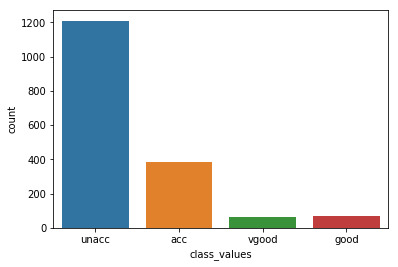

In [8]:
import seaborn as sns #import seaborn to plot
sns.countplot(car_data['class_values'],label="Count")  #use seaborn to plot the Bar plot
plt.show() #plot


In [9]:
feature_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'] #set the feature_names
X = car_data[feature_names]                                                   #set X in feature_names
y = car_data['class_values']                                                  #set y for the class_values

In [10]:
from sklearn.model_selection import train_test_split                       #import sklean to train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  #set training/testing parts

In [11]:
from sklearn.preprocessing import MinMaxScaler  #to preprocess
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN


In [12]:
from sklearn.neighbors import KNeighborsClassifier  #to use KNN

knn = KNeighborsClassifier()                        #use the Classifier
knn.fit(X_train, y_train)                           #input the data


print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train))) #show the result
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test))) #show the result

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.95


# confusion_matrix
用四個數字來探討判斷的精準度。

True Positive(TP,真陽)

False Positive(FP,偽陽)

False Negative(FN,偽陰)

True Negative(TN,真陰)


而在機器學習理論中，我們通常用以下precision, recall, f1-score來探討精確度。

precision = TP/(TP+FP) 

recall = TP/(TP+FN)

f1-score 則為以上兩者之「harmonic mean 調和平均數」 

f1-score= 2 x precision x recall/(recision + recall)

In [13]:
from sklearn.metrics import classification_report   #import classification_report
from sklearn.metrics import confusion_matrix        #to use the confusion_matrix
pred = knn.predict(X_test)                          #cal the predict result after knn
print(confusion_matrix(y_test, pred))               #show the confusion mat 
print(classification_report(y_test, pred)) #show the detail Accuracy that we can learn from the explanation above

[[ 88   0   8   0]
 [  4  12   0   2]
 [  8   0 290   0]
 [  1   0   0  19]]
             precision    recall  f1-score   support

        acc       0.87      0.92      0.89        96
       good       1.00      0.67      0.80        18
      unacc       0.97      0.97      0.97       298
      vgood       0.90      0.95      0.93        20

avg / total       0.95      0.95      0.95       432



In [14]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    tick_marks = np.arange(4)
    aa=['acc','good','unacc','vgood']
    plt.xticks(tick_marks, aa, rotation=45)
    plt.yticks(tick_marks, aa)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



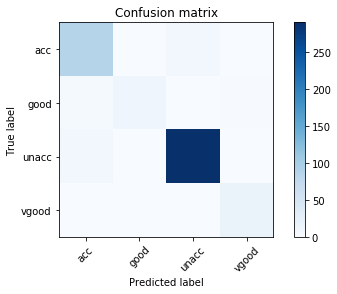

In [15]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, pred))
#plot_confusion_matrix(metrics.confusion_matrix(expected, predicted))

# SVM

In [16]:
from sklearn.svm import SVC  #import to use svm
 
svc = SVC()                  #to use svc
svc.fit(X_train, y_train)    #input the data

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))  #show the result
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))        #show the result

Accuracy on training set: 0.89
Accuracy on test set: 0.89


In [17]:
from sklearn.preprocessing import MinMaxScaler #for preprocessing

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()                         #to use svc
svc.fit(X_train_scaled, y_train)    #input the data

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))  #show the result
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))        #show the result

Accuracy on training set: 0.89
Accuracy on test set: 0.89


In [18]:
svc = SVC(C=1000) #tune the 'c' value
svc.fit(X_train_scaled, y_train)#input the data

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))#show the result
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))      #show the result

Accuracy on training set: 0.995
Accuracy on test set: 0.981


In [19]:
#show the final tresult of two different methods 
#
print('HW2 simple dataset')

#training part
print('----------------------------------------------------------------------------------')
print('Accuracy on training set')
print('KNN         : {:.3f}'.format(knn.score(X_train, y_train)))
print('SVM(C=1000) : {:.3f}'.format(svc.score(X_train, y_train)))

#testing part
print('----------------------------------------------------------------------------------')
print('Accuracy on test set')
print('KNN         : {:.3f}'.format(knn.score(X_test, y_test)))
print('SVM(C=1000) : {:.3f}'.format(svc.score(X_test_scaled, y_test)))

HW2 simple dataset
----------------------------------------------------------------------------------
Accuracy on training set
KNN         : 0.985
SVM(C=1000) : 0.995
----------------------------------------------------------------------------------
Accuracy on test set
KNN         : 0.947
SVM(C=1000) : 0.981
